# Exploration of the Fine-Grained Question Subjectivity Dataset (FQSD)

This notebook provides a comprehensive exploration of the `Fine-Grained Question Subjectivity Dataset (FQSD)`in the smartphone domain. Designed to distinguish not only between subjective and objective questions, FQSD offers additional categorizations to foster advancements in Automatic Subjective Question Answering (ASQA) systems.


## An Introduction to the Dataset

FQSD presents a curated collection of 10,000 questions, each meticulously classified to delve into the multifaceted aspects of question subjectivity. The dataset is heralded for its remarkable granularity and detailed categorizations, offering researchers and practitioners alike a robust foundation for examining and constructing ASQA systems.

### Main Classification Task

The FQSD segments questions into 10 unique classes, each tailored to offer insights into different dimensions of Fine-grained Subjectivity classification:

- **[TSS]:** Target Single Subjective
- **[TCS]:** Target Comparative Subjective
- **[ASS]:** Attitude Single Subjective
- **[ACS]:** Attitude Comparative Subjective
- **[RSS]:** Reason Single Subjective
- **[RCS]:** Reason Comparative Subjective
- **[YSS]:** Yes/No Single Subjective
- **[YCS]:** Yes/No Comparative Subjective
- **[NSO]:** None Single Objective
- **[NCO]:** None Comparative Objective

Each class serves as a lens through which the nuances of question subjectivity can be further discerned and analyzed, offering a structured framework for both exploration and model training within the domain.

## Diving Deeper: Exploring Subtasks

### 1. Subjectivity Classification

Under this subtask, the focus is pinned on bifurcating questions into generalized types such as:
- **[S]:** Subjective, where the question implies subjectivity or opinion.
- **[O]:** Objective, where the question seeks factual and verifiable information.

### 2. Comparison-form Classification

This classification subtask differentiates between distinct forms of questions:
- **[C]:** Comparative, implying a comparison between products.
- **[S]:** Single, implying no comparative analysis.

### 3. Subjective-types Classification

This level delves into the specific type of subjectivity found in questions, categorized as:
- **[T]:** Target,Inquiring about the entity subject to public perception.
- **[A]:** Attitude, Seeking the rationale behind prevailing public views about a particular entity.
- **[R]:** Reason, Querying public sentiment regarding a specific entity.
- **[Y]:** Yes/No, Probing to confirm the accuracy of a statement related to a particular entity.
- **[N]:** None

### 4. Subjectiveity_ComparisionForm Classification

This subtask meticulously categorizes subjective questions into further distinct types, such as:
- **[CS]:** Comparative Subjective
- **[CO]:** Comparative Objective
- **[SS]:** Single Subjective
- **[SO]:** Single Objective

FQSD, through its detailed categorization and well-defined structure, aims to be a pivotal tool for researchers and engineers in developing, validating, and optimizing ASQA systems, thus paving the way for more accurate and reliable subjectivity analysis in automated question answering.


In [10]:
###################################################################

## Dataset Instructions

1. Download the dataset from [this link](https://github.com/mahsamb/FSQD/blob/main/Dataset.zip).
2. Unzip the downloaded file to access the datasets.


In [11]:
import requests
import zipfile
import os

data_url = "https://github.com/mahsamb/FSQD/raw/main/Dataset.zip"
zip_filename = "Dataset.zip"

# Downloading using requests
response = requests.get(data_url)

# Check if the request was successful (status_code 200)
if response.status_code == 200:
    with open(zip_filename, "wb") as f:
        f.write(response.content)
else:
    print(f"Failed to retrieve the data: {response.status_code}: {response.text}")
    # Add additional error handling here

# Unzipping the dataset
try:
    with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
        zip_ref.extractall("data")
    print("Files extracted:")
    print(os.listdir("data"))
except zipfile.BadZipFile:
    print("Error: The file doesn’t appear to be a valid zip file")


Files extracted:
['Subjectivity_Dataset.csv', 'ComparisionForm_Dataset.csv', 'FSQD_Dataset.csv', 'Subjectivity_ComparisionForm_Dataset.csv', 'SubjectivityType_Dataset.csv']


In [12]:
###################################################################

# **Main Task: FSQD** (Fine-grained Question Subjectivity Dataset)


## Loading the Data

Let's kickstart our exploration by loading the dataset.


In [13]:
import pandas as pd

# Specify the file path for your CSV file
csv_file_path = '/content/data/FSQD_Dataset.csv'  # Replace with the actual file path

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)




## Sample Questions

Diving into random samples provides a qualitative touchpoint for the dataset.


In [14]:
df.sample(5)


,Question,Label
1624,Does the Pixel 4a support stereo recording dur...,NSO
3085,Why is the iPhone 12 Pro Max size so disfavored?,RSS
4329,What color selection brings out the Samsung X ...,TSS
9484,Why does the Samsung Galaxy Z Flip 3 have a be...,RCS
3889,Why might users observe a marked decrease in t...,RSS


## Basic Label Distribution

An understanding of the label distribution can shed light on dataset balance and characteristics.


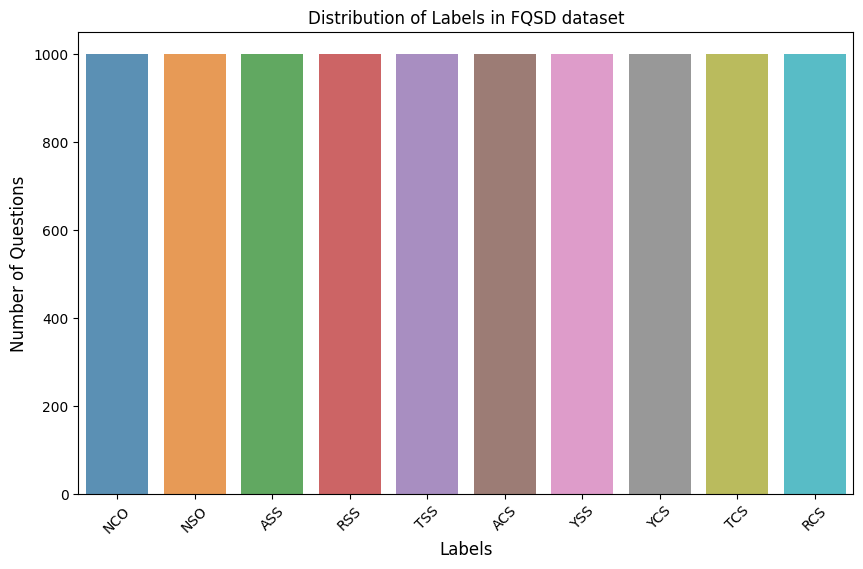

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns


label_distribution = df['Label'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=label_distribution.index, y=label_distribution.values, alpha=0.8)
plt.title("Distribution of Labels in FQSD dataset")
plt.ylabel("Number of Questions", fontsize=12)
plt.xlabel("Labels", fontsize=12)
plt.xticks(rotation=45)
plt.show()


In [16]:
###################################################################

# **Subtask1:** Subjectivity Dataset

## Loading the Data

In [17]:
import pandas as pd

# Specify the file path for your CSV file
csv_file_path = '/content/data/Subjectivity_Dataset.csv'  # Replace with the actual file path

# Read the CSV file into a DataFrame
df1 = pd.read_csv(csv_file_path)



## Sample Questions

In [18]:
df1.sample(5)

,Question,Label
5023,How bad is the Nokia Lumia 1320 compared to Sa...,S
6956,Are you satisfied with the temperature managem...,S
5769,"Embracing a new display paradigm, how does the...",S
3622,I need a phone that provides seamless software...,S
1179,Is it possible to replace the battery of your ...,O


## Basic Label Distribution

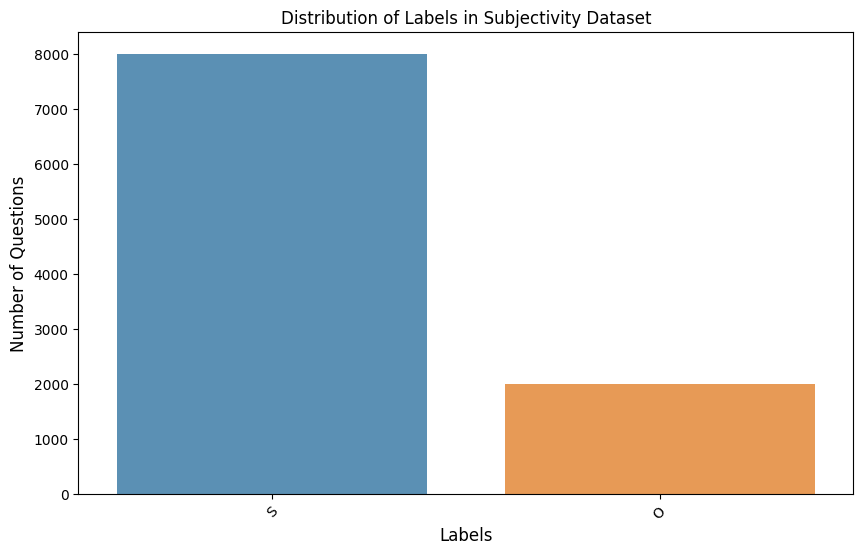

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns


label_distribution = df1['Label'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=label_distribution.index, y=label_distribution.values, alpha=0.8)
plt.title("Distribution of Labels in Subjectivity Dataset")
plt.ylabel("Number of Questions", fontsize=12)
plt.xlabel("Labels", fontsize=12)
plt.xticks(rotation=45)
plt.show()


In [20]:
###################################################################

# **Subtask2:** Comparision-Form Dataset

## Loading the Data

In [21]:
import pandas as pd

# Specify the file path for your CSV file
csv_file_path = '/content/data/ComparisionForm_Dataset.csv'  # Replace with the actual file path

# Read the CSV file into a DataFrame
df2 = pd.read_csv(csv_file_path)



## Sample Questions

In [22]:
df2.sample(5)

,Question,Label
5096,How satisfactory is shoot video on the Xiaomi ...,C
2251,How slim and lightweight is the HTC One E9+?,S
3414,Why might users choose the Micromax Canvas Inf...,S
7894,As our daily lives demand devices that keep up...,C
9274,"Interested in creative photography, why might ...",C


## Basic Label Distribution

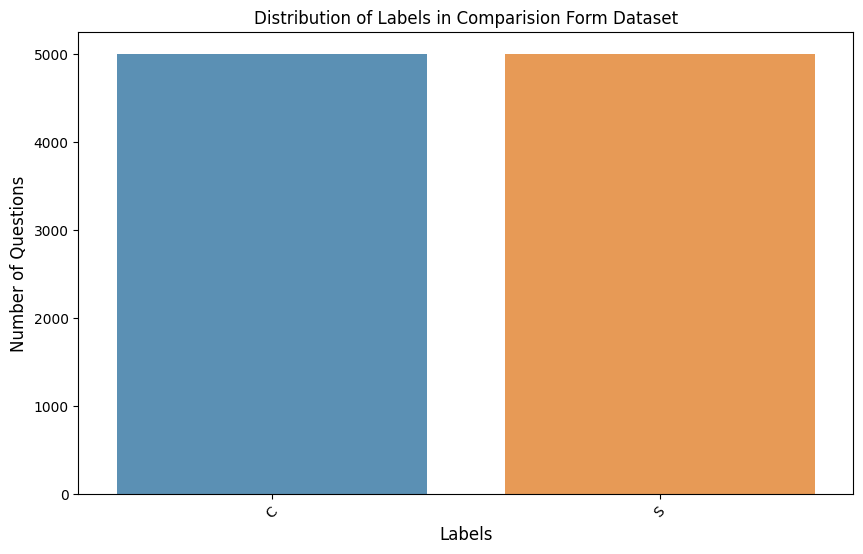

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns


label_distribution = df2['Label'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=label_distribution.index, y=label_distribution.values, alpha=0.8)
plt.title("Distribution of Labels in Comparision Form Dataset")
plt.ylabel("Number of Questions", fontsize=12)
plt.xlabel("Labels", fontsize=12)
plt.xticks(rotation=45)
plt.show()


In [24]:
###################################################################

# **Subtask3:** Subjectivity-Type Dataset

## Loading the Data

In [25]:

import pandas as pd

# Specify the file path for your CSV file
csv_file_path = '/content/data/SubjectivityType_Dataset.csv'  # Replace with the actual file path

# Read the CSV file into a DataFrame
df3 = pd.read_csv(csv_file_path)

# Print the first few rows of the DataFrame to verify the data
print(df3.head())


                                            Question Label
0  Why iPhone doesn't have an FM radio like Samsung?     N
1           Do iPads and iPhones have the same apps?     N
2  Why are iPhone screens cheaper to repair than ...     N
3  Why is the Samsung Galaxy phone screen much br...     N
4  Can the Google Pixel 6 with tensor have low la...     N


## Basic Label Distribution

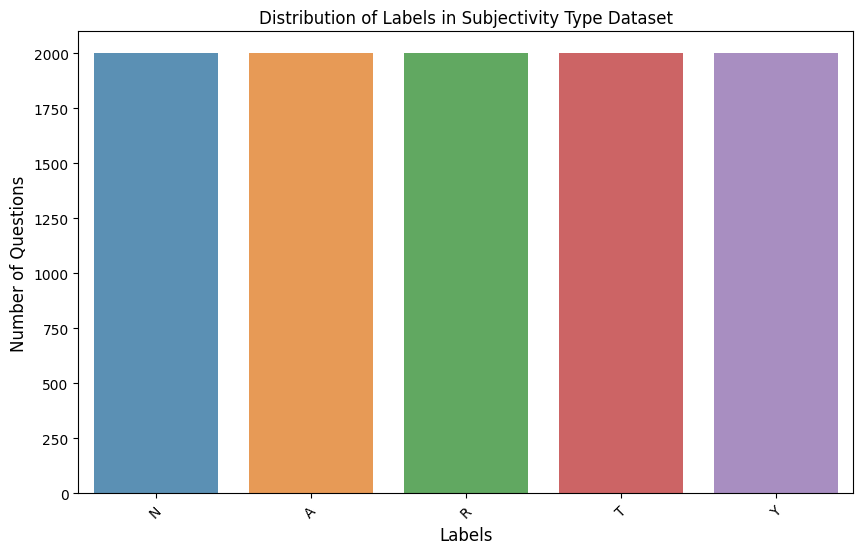

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns


label_distribution = df3['Label'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=label_distribution.index, y=label_distribution.values, alpha=0.8)
plt.title("Distribution of Labels in Subjectivity Type Dataset")
plt.ylabel("Number of Questions", fontsize=12)
plt.xlabel("Labels", fontsize=12)
plt.xticks(rotation=45)
plt.show()


## Sample Questions

In [27]:
df3.sample(5)

,Question,Label
2985,How satisfied are you with the accuracy and sp...,A
478,Why has the Samsung W21 Fold a larger memory c...,N
2304,How satisfied are you with the device's abilit...,A
2287,What are your thoughts on the HTC Desire Eye's...,A
1004,Does the Samsung Galaxy J7 Prime have a front ...,N


In [28]:
###################################################################

# **Subtask4:** SubjectivityType-ComparisionForm Dataset

## Loading the Data

In [29]:


import pandas as pd

# Specify the file path for your CSV file
csv_file_path = '/content/data/Subjectivity_ComparisionForm_Dataset.csv'  # Replace with the actual file path

# Read the CSV file into a DataFrame
df4 = pd.read_csv(csv_file_path)




## Sample Questions

In [30]:
df4.sample(5)

,Question,Label
926,What is the difference between iPhone X and iP...,CO
4042,What apps do people like on the newest iPhone?,SS
1177,Does the Huawei P30 use Face ID?,SO
9213,Why does Razer Phone 5 X's integration of AI-d...,CS
5443,How is the Nokia Lumia 1320 compared to Samsun...,CS


## Basic Label Distribution

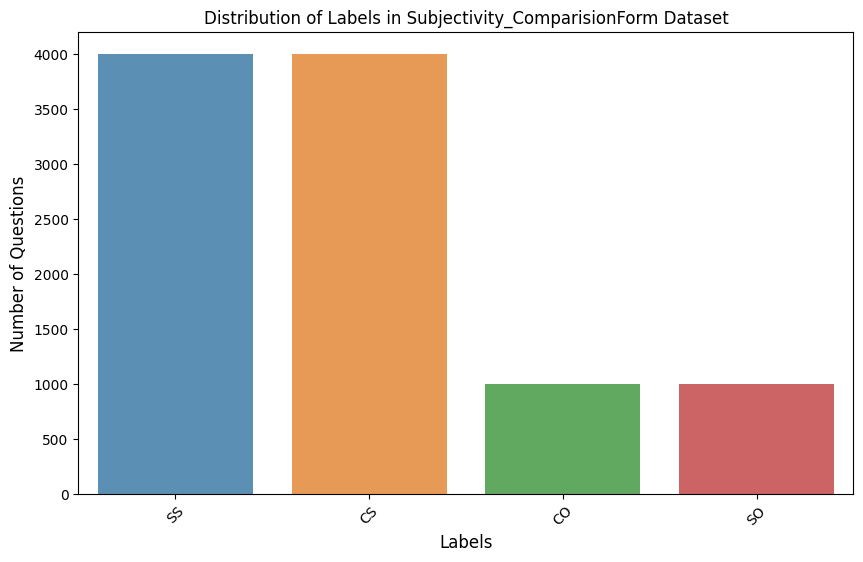

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns


label_distribution = df4['Label'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=label_distribution.index, y=label_distribution.values, alpha=0.8)
plt.title("Distribution of Labels in Subjectivity_ComparisionForm Dataset")
plt.ylabel("Number of Questions", fontsize=12)
plt.xlabel("Labels", fontsize=12)
plt.xticks(rotation=45)
plt.show()


In [32]:
###################################################################

## Concluding Remarks

The FQSD, with its rich annotations and granular classifications, paves the way for deeper research into question subjectivity. Its layered approach, encompassing a primary task and detailed subtasks, promises to elevate the field of ASQA systems.
